# Lab Segmentation 2

In [26]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
def getTinit (pic1):   
    hist = histogram(pic1, list(range(0, 256)), 'dtype')[0]
    sumOfGrayLevels = sum(grayLevel * noPixels for grayLevel,noPixels in enumerate(hist))
    sumOfPixels = np.cumsum(hist)[-1]
    Tinit = round(sumOfGrayLevels/sumOfPixels)
    
    return Tinit

In [28]:
def iterativeThresholding (pic1):   
    Told=getTinit(pic1)
    Tlower=getTinit(pic1[pic1<=Told])
    Thigher=getTinit(pic1[pic1>Told])
    Tcurrent = round((Tlower+Thigher)/2)
    Tlower=getTinit(pic1[pic1<=Tcurrent])
    Thigher=getTinit(pic1[pic1>Tcurrent])
    Tnew = round((Tlower+Thigher)/2)
    while(Tnew!=Tcurrent):
        Tlower=getTinit(pic1[pic1<=Tnew])
        Thigher=getTinit(pic1[pic1>Tnew])
        Tcurrent=Tnew
        Tnew = round((Tlower+Thigher)/2)
    return Tnew

In [29]:
def automaticThreshold (img):
    copy = np.copy(img)
    Tnew = iterativeThresholding(copy)
    copy[copy<=Tnew] = 0
    copy[copy>Tnew] = 255
    return copy

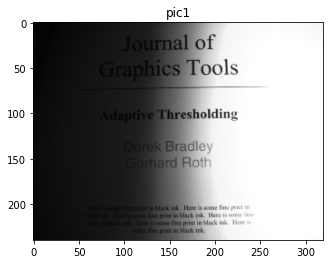

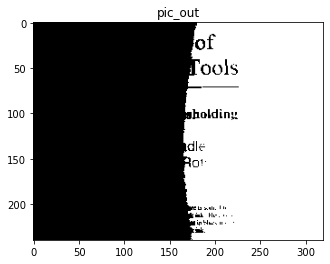

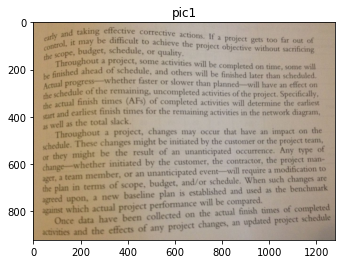

(922, 1278, 3)


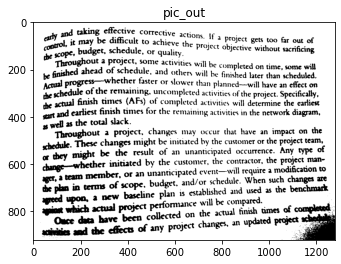

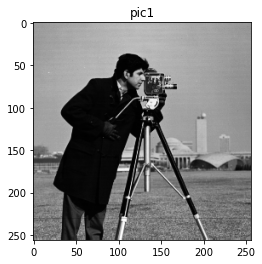

(256, 256)


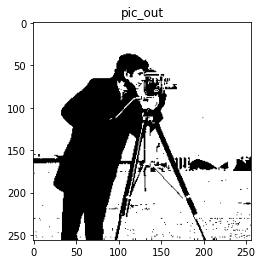

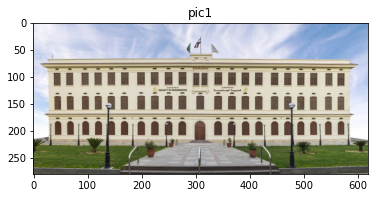

(279, 620, 3)


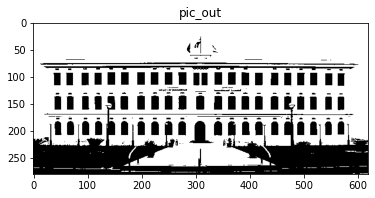

In [30]:
pic1 = io.imread('book.png').astype('uint8') 
show_images([pic1],['pic1'])
pic_out=automaticThreshold (pic1)
show_images([pic_out],['pic_out'])


pic1 = io.imread('book1.png').astype('uint8')
show_images([pic1],['pic1'])
print(pic1.shape)
pic1=rgb2gray(pic1)
pic1=pic1*255
pic_out=automaticThreshold (pic1)
show_images([pic_out],['pic_out'])

pic1 = io.imread('cameraman.png').astype('uint8')
show_images([pic1],['pic1'])
print(pic1.shape)
pic1=pic1
pic_out=automaticThreshold (pic1)
show_images([pic_out],['pic_out'])

pic1 = io.imread('cufe.png').astype('uint8')
show_images([pic1],['pic1'])
print(pic1.shape)
pic1=rgb2gray(pic1)
pic1=pic1*255
pic_out=automaticThreshold (pic1)
show_images([pic_out],['pic_out'])

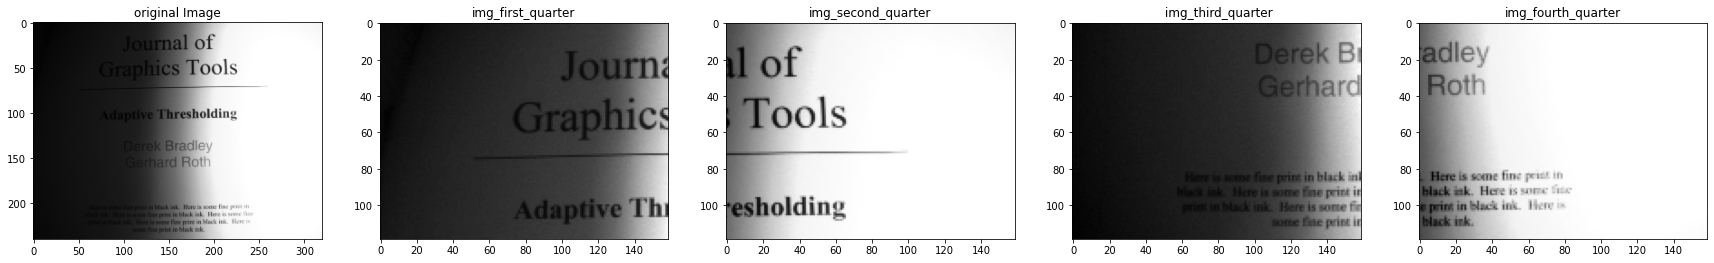

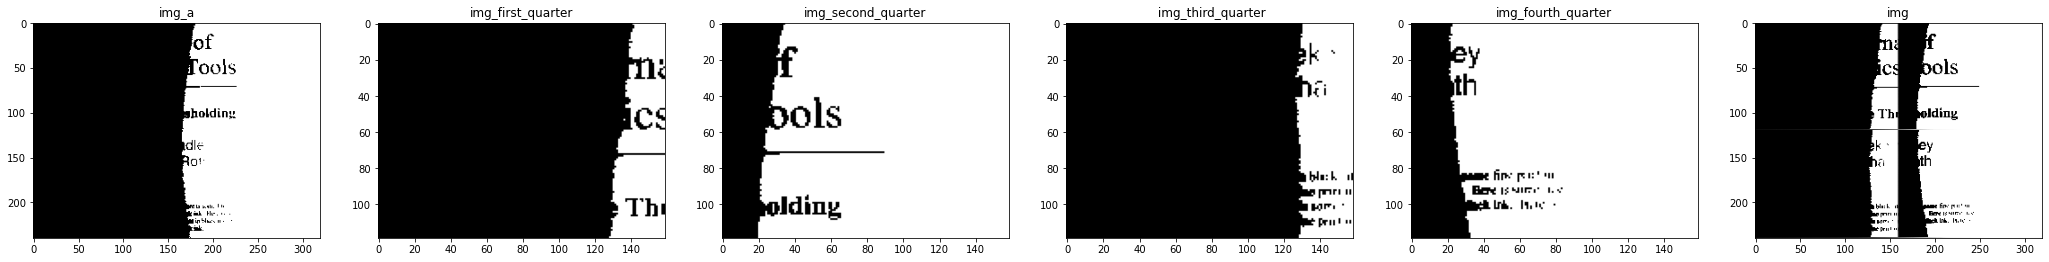

In [31]:
img=io.imread('book.png').astype('uint8')
img_height=len(img)
img_width=len(img[0])
split_img_height=img_height/2
split_img_height=int(split_img_height)
split_img_width=img_width/2
split_img_width=int(split_img_width)

img_first_quarter=img[0:split_img_height-1,0:split_img_width-1].copy()
img_second_quarter=img[0:split_img_height-1,split_img_width:img_width-1].copy()
img_third_quarter=img[split_img_height:img_height-1,0:split_img_width-1].copy()
img_fourth_quarter=img[split_img_height:img_height-1,split_img_width:img_width-1].copy()

show_images([img,img_first_quarter,img_second_quarter,img_third_quarter,img_fourth_quarter], titles=['original Image','img_first_quarter','img_second_quarter',' img_third_quarter','img_fourth_quarter'])

img_a=automaticThreshold (img)
img_first_quarter_a=automaticThreshold (img_first_quarter)
img_second_quarter_a=automaticThreshold (img_second_quarter)
img_third_quarter_a=automaticThreshold (img_third_quarter)
img_fourth_quarter_a=automaticThreshold (img_fourth_quarter)
img[0:split_img_height-1,0:split_img_width-1]=img_first_quarter_a
img[0:split_img_height-1,split_img_width:img_width-1]=img_second_quarter_a
img[split_img_height:img_height-1,0:split_img_width-1]=img_third_quarter_a
img[split_img_height:img_height-1,split_img_width:img_width-1]=img_fourth_quarter_a
show_images([img_a,img_first_quarter_a,img_second_quarter_a,img_third_quarter_a,img_fourth_quarter_a,img], titles=['img_a','img_first_quarter','img_second_quarter',' img_third_quarter','img_fourth_quarter','img'])